<a href="https://colab.research.google.com/github/Tysondgn/ML_Repository/blob/main/Mileage_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mileage Prediction**

##**Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##**Import Data**

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Tysondgn/ML_Repository/main/Dataset/MPG.csv')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

##**Data Preprocessing**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [7]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


##**Removing Missing Values**

In [8]:
df = df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


##**Data Visualization**

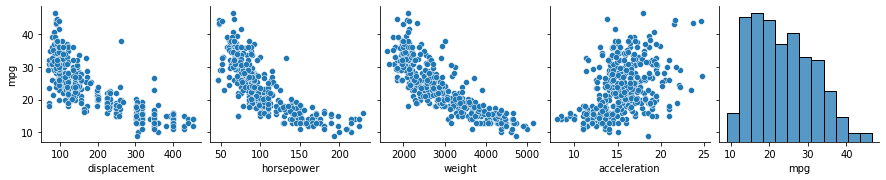

In [10]:
sns.pairplot(df, x_vars= ['displacement', 'horsepower' ,'weight', 'acceleration', 'mpg'], y_vars= ['mpg'])

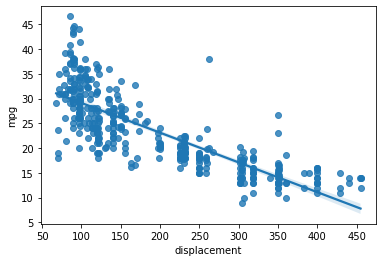

In [11]:
sns.regplot(x = 'displacement' , y = 'mpg' , data = df)

##**Define Target Variable y and Feature X**

In [12]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [13]:
y = df['mpg']

In [14]:
y.shape

(392,)

In [15]:
X = df[[ 'displacement', 'horsepower', 'weight', 'acceleration']]

In [16]:
X.shape

(392, 4)

##**Scaling Data**

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
ss = StandardScaler()

In [19]:
X = ss.fit_transform(X)

##**Test Train Split Data**

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7 , random_state = 82529)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((274, 4), (118, 4), (274,), (118,))

##**Linear Regression Model**

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lr = LinearRegression()

In [25]:
lr.fit(X_train, y_train)

LinearRegression()

In [26]:
lr.intercept_

23.327666598968715

In [27]:
lr.coef_

array([-0.86030753, -2.11680867, -4.09945185, -0.53001816])

**Mileage = 23.4 - 1.05 Displacement - 1.68 Horsepower - 4.10 Weight - 0.115 Acceleration + error**

##**Predict Test Data**

In [28]:
y_pred = lr.predict(X_test)

In [29]:
y_pred

array([27.2226506 , 30.38161489, 21.18152779, 14.88734321, 29.56441236,
       24.95348021, 23.12581503, 29.74325731, 31.91677874, 29.42873163,
        9.4359437 , 23.19724082, 12.65616028, 21.77223915, 29.66612362,
        8.83779897, 30.15570817, 30.06702496, 20.55839292, 11.77268742,
        7.60063179, 15.42115485, 19.05928808, 22.124985  , 14.87862698,
       27.64059993, 11.6314967 , 12.29044877, 11.34591366, 14.78679951,
       29.21586453, 32.37032903, 14.43309342, 30.94704451, 30.42532803,
       23.4820533 , 32.15307229, 16.40375152, 27.128534  , 29.89047202,
       31.22952243, 23.85086708, 29.09289355, 24.27678126, 28.36953866,
       14.03579683, 30.1302696 , 30.27900439, 30.60189527, 21.58889708,
       10.12565619, 24.08692324, 10.7236289 , 28.60038525, 22.21085759,
       25.45863319, 22.21719221, 14.07403759, 10.16230898, 27.87743066,
       21.42593679, 25.87993393, 23.43590104, 23.26908006, 19.59979984,
       26.74286572, 24.64598584, 28.87438443, 27.54984563, 11.42

##**Model Accuracy**

In [30]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [31]:
mean_absolute_error(y_test, y_pred)

2.9768516847297444

In [32]:
mean_absolute_percentage_error(y_test, y_pred)

0.1343729493770433

In [33]:
r2_score(y_test, y_pred)

0.7555986329399982

##**Polynomial Regression**

In [34]:
from sklearn.preprocessing import PolynomialFeatures

In [35]:
poly = PolynomialFeatures(degree = 2, interaction_only=True, include_bias=False)

In [36]:
X_train2 = poly.fit_transform(X_train)

In [37]:
X_test2 = poly.fit_transform(X_test)

In [38]:
lr.fit(X_train2, y_train)

LinearRegression()

In [39]:
lr.intercept_

21.012359467524067

In [40]:
lr.coef_

array([-1.98203764, -5.13407518, -2.10213519, -1.26402331,  0.91681487,
        1.04417644,  0.11685319,  0.54340422, -1.00129154,  1.20572375])

In [41]:
y_pred_poly = lr.predict(X_test2)

##**Model Accuracy**

In [42]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [43]:
mean_absolute_error(y_test, y_pred_poly)

2.486314469827756

In [44]:
mean_absolute_percentage_error(y_test, y_pred_poly)

0.10542605085597197

In [45]:
r2_score(y_test, y_pred_poly)

0.8083854025489037